# importation des bibliothèques :

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error

# lecture des fichiers et importation des données

In [2]:
stations=pd.read_csv("stations.csv")
tickets=pd.read_csv("ticket_data.csv")
cities=pd.read_csv("cities.csv")
providers=pd.read_csv("providers.csv")

# Affichage des informations 

In [3]:
#affichages de 5 elements de chaque fichier
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [4]:
tickets.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [5]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [6]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'company'}>,
        <AxesSubplot:title={'center':'o_station'}>],
       [<AxesSubplot:title={'center':'d_station'}>,
        <AxesSubplot:title={'center':'price_in_cents'}>,
        <AxesSubplot:title={'center':'o_city'}>],
       [<AxesSubplot:title={'center':'d_city'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

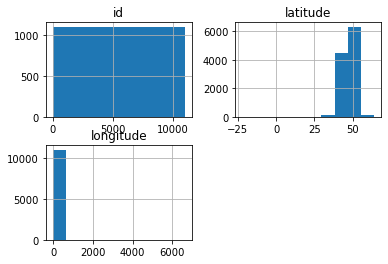

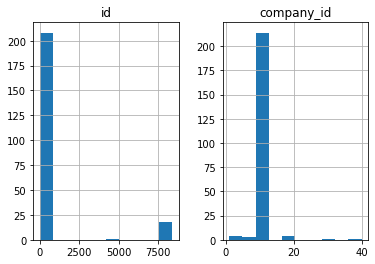

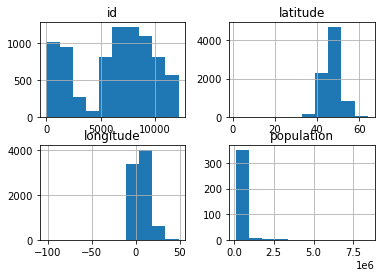

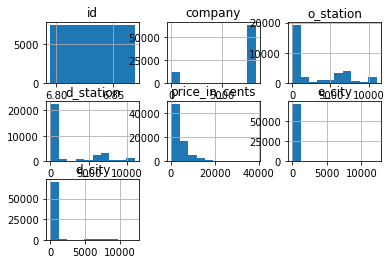

In [7]:
#affichage des histogrammes de chaque dataframe
stations.hist()
providers.hist()
cities.hist()
tickets.hist()

In [8]:
#affichage des infos concernant chaque dataframe 
tickets.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


# Informations sur les prix :
#### le prix  max en cents : 38550
#### le prix moyen en cents : 4382.711
#### le prix min en cents : 300


In [9]:
tickets['arrival_ts']=pd.to_datetime(tickets['arrival_ts'])
tickets['departure_ts']=pd.to_datetime(tickets['departure_ts'])

#ajout d'une colonne durée 

tickets['duration']=tickets['arrival_ts']-tickets['departure_ts']
print(tickets['arrival_ts'][0]-tickets['departure_ts'][0])
tickets['duration'].describe()

0 days 06:10:00


count                        74168
mean     0 days 07:04:37.247600043
std      0 days 09:54:58.881351022
min                0 days 00:20:00
25%                0 days 03:00:00
50%                0 days 04:50:00
75%                0 days 08:00:00
max               20 days 12:51:00
Name: duration, dtype: object

#  Informations sur les durées:
#### la durée max : 20 days 12:51:00
#### la durée moyenne  : 0 days 07:04:37.247600043
#### la durée min  : 0 days 00:20:00

# Rapport prix / duration :

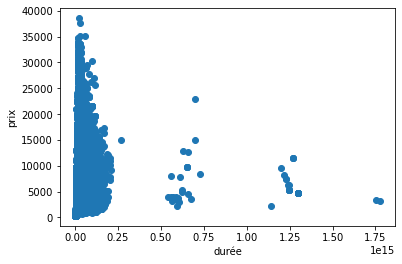

In [35]:
x=tickets['duration']
y=tickets['price_in_cents']
plt.scatter(x,y)
plt.xlabel("durée")
plt.ylabel("prix")
plt.show()


# Interpretation des résultats :
##### On peut constater que plus que la durée du voyage est petite plus que le prix est elevé, mais on peut aussi remarquer que  il y'a un autre facteur qui impacte le prix appart la durée, notre objectif sera donc de savoir ce facteur.

In [11]:
cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [12]:
providers.describe()

,id,company_id
count,227.000000,227.000000
mean,790.656388,9.343612
std,2251.823950,3.036065
min,9.000000,1.000000
25%,66.500000,9.000000
50%,127.000000,9.000000
75%,183.500000,9.000000
max,8389.000000,40.000000


In [13]:
stations.describe()

,id,latitude,longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896447,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


In [14]:
#la jointure des deux data frame contennant les informations des providers et des tickets pour faciliter la manipulation jointure par id de la company
providers.rename(columns = {'company_id':'company'}, inplace = True)
data=tickets.merge(providers,how='inner',on='company')
data.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,duration,id_y,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,0 days 17:50:00,16,NaN,distribusion,Distribusion,False,False,False,False,bus
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,0 days 17:50:00,17,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,0 days 17:50:00,18,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,0 days 17:50:00,19,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,0 days 17:50:00,20,41,icBus,IC Bus,False,False,False,False,bus


In [23]:
#on groupe les données en utilisant le type du transport et on interprete les résultats
g=data.groupby('transport_type').mean('price_in_cents')
print(data.groupby('transport_type').mean('price_in_cents'))

                        id_x    company    o_station    d_station  \
transport_type                                                      
bus             6.831962e+06   9.000013  1790.765065  1435.157913   
carpooling      6.851992e+06  12.000000   331.000000   864.000000   
train           6.822414e+06  10.000000   174.555556  3583.000000   

                price_in_cents       o_city      d_city         id_y  
transport_type                                                        
bus                3333.038196   561.745612  692.146292   119.755622  
carpooling         3868.800000  1010.600000  932.200000  8389.000000  
train              3265.555556  5014.555556  643.000000  7992.700000  


# Informations  selon le type du transport :
#### le prix moyen pour le transport de type bus : 3333.03 cent
#### le prix moyen pour le transport de type carpooling : 3868.80 cent
#### le prix moyen pour le transport de type train : 3265.55 cent
# Interprétation :
#### ces résultats nous montrent que le type de transport a aussi un impact sur les prix des voyages, puisque on peut constater que les voyages réalisés à l'aide des carpooling sont les plus chers, suivis par ceux effectués avec le bus et finalement les moins coûteux sont les voyages effectués par les trains. 

In [16]:
data.describe()

,id_x,company,o_station,d_station,price_in_cents,o_city,d_city,duration,id_y
count,7.156640e+05,715664.000000,715664.000000,715664.00000,715664.000000,715664.000000,715664.000000,715664,715664.000000
mean,6.831961e+06,9.000159,1790.551616,1435.42403,3333.033453,562.308722,692.141789,0 days 14:14:49.416430056,120.803476
std,2.196667e+04,0.014184,3363.595403,2837.36830,1599.058024,485.069692,1188.234611,0 days 08:46:15.729388869,113.490921
min,6.795026e+06,9.000000,3.000000,3.00000,850.000000,11.000000,6.000000,0 days 02:20:00,16.000000
25%,6.809978e+06,9.000000,279.000000,304.00000,2190.000000,453.000000,446.000000,0 days 08:40:00,67.000000
50%,6.835249e+06,9.000000,412.000000,487.00000,3080.000000,580.000000,542.000000,0 days 11:45:00,121.000000
75%,6.850274e+06,9.000000,701.000000,800.00000,4090.000000,628.000000,628.000000,0 days 17:55:00,171.000000
max,6.869185e+06,12.000000,10865.000000,10894.00000,14596.000000,12124.000000,12190.000000,8 days 09:45:00,8389.000000


# Modele de prédiction : 

In [17]:
#la suppression des lignes dupliquées
data=data.drop_duplicates()
features1=['company','o_station','d_station','o_city','d_city']
X=data[features1]
#choix des features
Y=data['price_in_cents']
X.tail()
#715663

,company,o_station,d_station,o_city,d_city
715659,12,283.0,1595.0,1061,1477
715660,12,283.0,1593.0,1061,1477
715661,12,523.0,86.0,809,89
715662,12,283.0,523.0,1061,809
715663,12,283.0,523.0,1061,809


In [18]:
#la devision de la data en data train pour entrainement et data test pour effectuer les test sur le modele creer
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)

# Definition du modele utilisé
price_prediction_model = DecisionTreeRegressor(random_state=1)

#l'entrainement du modele
price_prediction_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [32]:
#affichage des résultats des prédictions
print(X.head())
print("The predictions are")
Y_value=price_prediction_model.predict(val_X)
print(Y_value)
print(data['price_in_cents'].head())
print(mean_absolute_error(val_y, Y_value))

   company  o_station  d_station  o_city  d_city
0        9       63.0     1044.0     611     542
1        9       63.0     1044.0     611     542
2        9       63.0     1044.0     611     542
3        9       63.0     1044.0     611     542
4        9       63.0     1044.0     611     542
The predictions are
[5771.92371476 3952.33846861 3882.81828074 ... 4738.38187702 2460.50520632
 2373.89390519]
0    1450
1    1450
2    1450
3    1450
4    1450
Name: price_in_cents, dtype: int64
415.9780765778001
